# House prices

First step of data analysis is, make a simple prediction model and get the idea of the entire process of data analysis, which includes import data, develop data for model, make model, predict, and submit your result.

## Packages used

In [1]:
# basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

## Data

In [2]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(df.shape)

(1460, 81)


## Check missing values.

Having missing values often causes errors in model building so check them in advance.

In [8]:
missing = df.isnull().sum().sort_values(ascending = False)
missing[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

## EDA

Check how our response looks like.

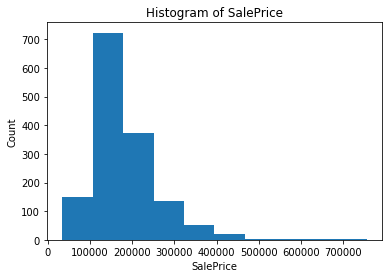

In [10]:
_ = plt.hist(df['SalePrice'])
_ = plt.xlabel('SalePrice')
_ = plt.ylabel('Count')
_ = plt.title('Histogram of SalePrice')
plt.show()

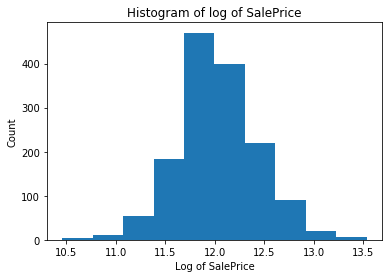

In [11]:
_ = plt.hist(np.log(df['SalePrice']))
_ = plt.xlabel('Log of SalePrice')
_ = plt.ylabel('Count')
_ = plt.title('Histogram of log of SalePrice')
plt.show()

## Predictor variables

In [9]:
cols = df.columns
num_cols = df._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
print('Number of numeric columns:', len(num_cols))
print('Number of categorical columns:', len(cat_cols))

Number of numeric columns: 41
Number of categorical columns: 43


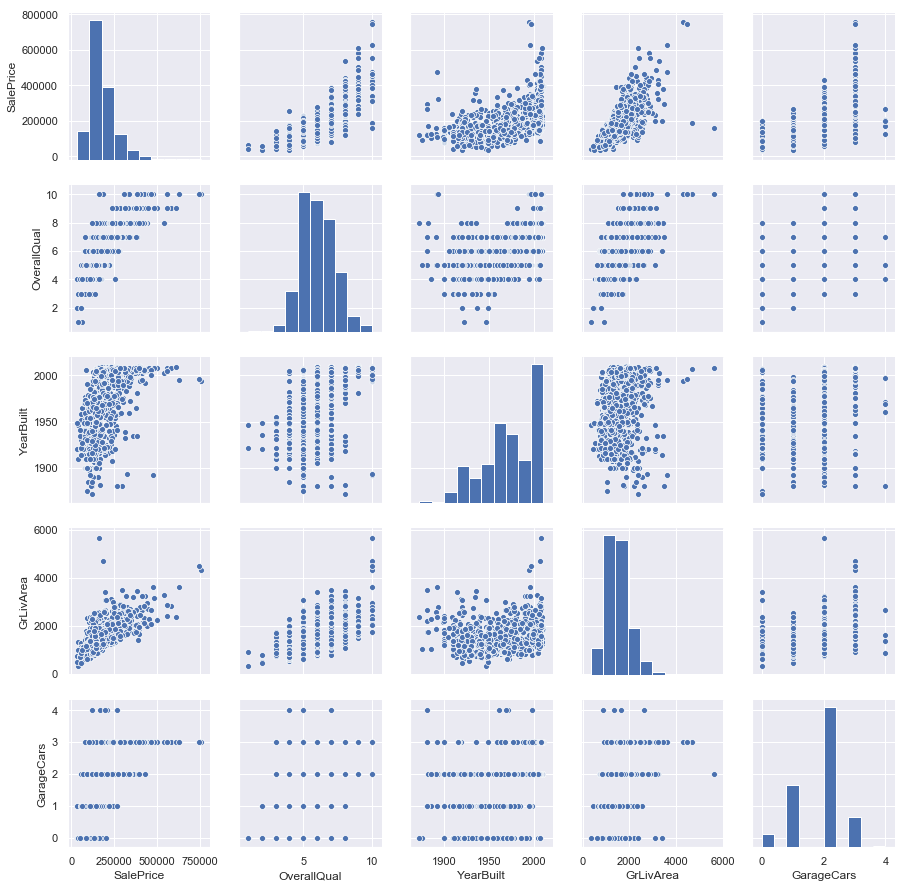

In [12]:
sns.set()
COLUMNS = ['SalePrice', 'OverallQual', 'YearBuilt', 'GrLivArea', 'GarageCars']
_ = sns.pairplot(df[COLUMNS])
plt.show()

## Model 

As we saw, there are many numeric and categorical variables. But to get the idea of model development process, we only use 4 numeric variables and perform multiple regression model.

In [13]:
COLUMNS = ['OverallQual', 'YearBuilt', 'GrLivArea', 'GarageCars']
X = df[COLUMNS].values
y = df['SalePrice'].values
print(y.shape)
print(X.shape)

(1460,)
(1460, 4)


In [14]:
model = LinearRegression()
model.fit(X, y)
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)
train_pred = model.predict(X)
print(pd.Series(train_pred).describe())

coefficient of determination: 0.7499336967175796
count      1460.000000
mean     180921.195890
std       68796.184493
min      -40384.141223
25%      127023.942743
50%      176501.183086
75%      226178.139533
max      520526.322936
dtype: float64


## Prediction 

In [15]:
test = pd.read_csv("test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Imputation to test dataset

If we have missing values in the predictor variables in test data, we can use the model we built in training data, so check them. And if any, we impute.

In [16]:
# checking number of missing values
COLUMNS = ['OverallQual', 'YearBuilt', 'GrLivArea', 'GarageCars']
X_test = test[COLUMNS]
X_test.isnull().sum()

OverallQual    0
YearBuilt      0
GrLivArea      0
GarageCars     1
dtype: int64

In [17]:
# imputing missing values
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
X_test = imp_mean.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns = COLUMNS)
print(X_test.shape)
print(X_test.isnull().sum())

(1459, 4)
OverallQual    0
YearBuilt      0
GrLivArea      0
GarageCars     0
dtype: int64


## Prediction of test data

In [19]:
test_pred = model.predict(X_test)
print(pd.Series(test_pred).describe())

count      1459.000000
mean     178806.668170
std       68938.001365
min       -4683.428985
25%      125582.424596
50%      170639.131403
75%      224628.831270
max      505750.868985
dtype: float64


The model we made predicts negative prices which is not reasonable, so we replace them with 0.

In [20]:
test_pred = np.where(test_pred < 0, 0, test_pred)
print(pd.Series(test_pred).describe())

count      1459.000000
mean     178810.450209
std       68928.071644
min           0.000000
25%      125582.424596
50%      170639.131403
75%      224628.831270
max      505750.868985
dtype: float64


In [21]:
sub = pd.DataFrame({'Id': test['Id'], 'SalePrice': pd.Series(test_pred)})
print(sub.head())

     Id      SalePrice
0  1461  104631.011088
1  1462  150913.324608
2  1463  175269.539881
3  1464  197145.045517
4  1465  222505.016522


## Submission

In [90]:
# sub.to_csv('C:\\Users\\yukic\\Documents\\kaggle\\houseprices\\submission_190513.csv', index = False)